In [1]:
import pandas as pd


from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parents[1]))

from utilities import get_region_border, set_catch_ratio
from plot_data import plot_all_catches
from fetch_data import fetch_data_from_fiskeridirektoratet, fetch_data_from_copernicus_marine

/home/anna/msc_oppgave/fish-forecast/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
REGIONS_PATH = '/home/anna/msc_oppgave/fish-forecast/areas.json'
MAC_REGIONS = ["FA_Makrell_JulNov_winter_resized"]
MAC_TIMES = {"FA_Makrell_JulNov_winter_resized": ['07-01', '11-30']}

years = [2019, 2024] # start and end year for the data to inspect

region_coords = get_region_border(REGIONS_PATH, MAC_REGIONS[0])
df_full = pd.DataFrame()

for y in range(years[0], years[1] + 1):
	test_params_fdir = {
				"dataset_path": "/home/anna/msc_oppgave/data/fiskeridirektoratet/",
				"time": [f"{y}-{MAC_TIMES[MAC_REGIONS[0]][0]}", f"{y}-{MAC_TIMES[MAC_REGIONS[0]][1]}"],
				"species": "MAC"
			}

	test_params_fdir.update(region_coords)
	ds = fetch_data_from_fiskeridirektoratet(test_params_fdir, day_samples=False)

	ds = set_catch_ratio(test_params_fdir, ds, 1.0, method='continuous')

	df_full = pd.concat([df_full, ds])
df_full = df_full.reset_index(drop=True)



13:57:03.443 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:99 - Searching years: 2019 - 2019
13:57:03.444 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:109 - Searching for fish species: MAC
13:57:09.595 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:127 - First and last entry for year 2019: 01.07.2019 23:01:00 - 30.11.2019 17:26:00
13:57:09.595 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:129 - Data for year 2019 shape: (867, 9)
13:57:09.613 | DEBUG    | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:140 - Dataframe shape after removing outside ROI catch: (751, 12)
13:57:09.616 | INFO     | /home/anna/msc_oppgave/fish-forecast/fetch_data.py:172 - Final dataset shape: (751, 5)
13:57:09.621 | INFO     | /home/anna/msc_oppgave/fish-forecast/utilities.py:133 - Period used (%): 43/153 = 28.10% -> Days w/o: 110
13:57:09.624 | INFO     | /home/anna/msc_oppgave/fish-forecast/utilities.py:171 - Dates with catch (%): 100

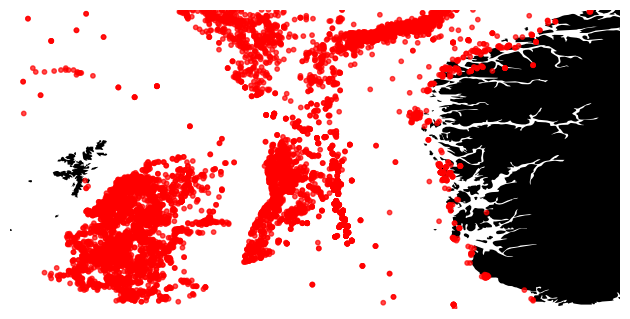

In [3]:
plot_all_catches(df_full, region_coords, use_catch_weight=False) 

In [4]:
    # dataset = copernicusmarine.open_dataset(
    #     dataset_id=params["dataset_id"],
    #     minimum_longitude=params["longitude"][0],
    #     maximum_longitude=params["longitude"][1],
    #     minimum_latitude=params["latitude"][0],
    #     maximum_latitude=params["latitude"][1],
    #     start_datetime=params["time"][0],
    #     end_datetime=params["time"][1],
    #     variables=params["variables"]


dataset_dict = {
    "dataset_id": "cmems_mod_glo_phy_my_0.083deg_P1D-m",
    "longitude": [region_coords["SW"]["lon"], region_coords["SE"]["lon"]],
    "latitude": [region_coords["SW"]["lat"], region_coords["NE"]["lat"]],
    "time": [f"2021-06-30T00:00:00", f"2021-06-30T00:00:00"],
    "variables": ["bottomT", "mlotst", "siconc", "sithick", "so", "thetao", "uo", "usi", "vo", "vsi", "zos"]
}

copernicus_data = fetch_data_from_copernicus_marine(dataset_dict)
copernicus_data

INFO - 2025-06-20T11:57:47Z - Selected dataset version: "202311"
INFO - 2025-06-20T11:57:47Z - Selected dataset part: "default"


<xarray.Dataset> Size: 13MB
Dimensions:    (depth: 50, latitude: 62, longitude: 126, time: 1)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 248B 58.0 58.08 58.17 ... 62.92 63.0 63.08
  * longitude  (longitude) float32 504B -2.417 -2.333 -2.25 ... 7.833 7.917 8.0
  * time       (time) datetime64[ns] 8B 2021-06-30
Data variables:
    bottomT    (time, latitude, longitude) float64 62kB ...
    mlotst     (time, latitude, longitude) float64 62kB ...
    siconc     (time, latitude, longitude) float64 62kB ...
    sithick    (time, latitude, longitude) float64 62kB ...
    so         (time, depth, latitude, longitude) float64 3MB ...
    thetao     (time, depth, latitude, longitude) float64 3MB ...
    uo         (time, depth, latitude, longitude) float64 3MB ...
    usi        (time, latitude, longitude) float64 62kB ...
    vo         (time, depth, latitude, longitude) float64 3MB ...
    vsi        (time, latitude, longitude) float64 62kB ...
    zos        (time, latitude, longitude) float64 62kB ...
Attributes:
    institution:  MERCATOR OCEAN
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    source:       MERCATOR GLORYS12V1

In [5]:
# Extract all latitudes and longitudes from the region bounding box
lats = [corner["lat"] for corner in region_coords.values()]
lons = [corner["lon"] for corner in region_coords.values()]

min_lat = min(lats)
max_lat = max(lats)
min_lon = min(lons)
max_lon = max(lons)

print(f"Latitude  → min: {min(lats)}, max: {max(lats)}")
print(f"Longitude → min: {min(lons)}, max: {max(lons)}")
# Start dimensions: (lat: 62, lon: 126)

resolution = 0.083  # Size of one grid cell in degrees
lat_ext = 2 * resolution  # Extend latitude by 2 grid cells
lon_ext = 2 * resolution  # Extend longitude by 2 grid cells
new_coords = {
    "SW": {"lat": min_lat - lat_ext/2, "lon": min_lon - lon_ext/2},
    "SE": {"lat": min_lat - lat_ext/2, "lon": max_lon + lon_ext/2},
    "NE": {"lat": max_lat + lat_ext/2, "lon": max_lon + lon_ext/2},
    "NW": {"lat": max_lat + lat_ext/2, "lon": min_lon - lon_ext/2}
}

# Define the new coordinates for the square around the region
pad_lat = [66, 0]
pad_lon = [1, 1]
square_coords = {
	"SW": {"lat": min_lat - pad_lat[0]*resolution, "lon": min_lon - pad_lon[0]*resolution},
    "SE": {"lat": min_lat - pad_lat[0]*resolution, "lon": max_lon + pad_lon[1]*resolution},
    "NE": {"lat": max_lat + pad_lat[1]*resolution, "lon": max_lon + pad_lon[1]*resolution},
    "NW": {"lat": max_lat + pad_lat[1]*resolution, "lon": min_lon - pad_lon[0]*resolution}
}

dataset_dict_test = {
    "dataset_id": "cmems_mod_glo_phy_my_0.083deg_P1D-m",
    "longitude": [new_coords["SW"]["lon"], new_coords["SE"]["lon"]],
    "latitude": [new_coords["SW"]["lat"], new_coords["NE"]["lat"]],
    "time": [f"2021-06-30T00:00:00", f"2021-06-30T00:00:00"],
    "variables": ["bottomT", "mlotst", "siconc", "sithick", "so", "thetao", "uo", "usi", "vo", "vsi", "zos"]
}

copernicus_data_test = fetch_data_from_copernicus_marine(dataset_dict_test)
copernicus_data_test

Latitude  → min: 57.941841, max: 63.087933
Longitude → min: -2.425635, max: 8.060814


INFO - 2025-06-20T11:57:51Z - Selected dataset version: "202311"
INFO - 2025-06-20T11:57:51Z - Selected dataset part: "default"


<xarray.Dataset> Size: 14MB
Dimensions:    (depth: 50, latitude: 64, longitude: 128, time: 1)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 256B 57.92 58.0 58.08 ... 63.0 63.08 63.17
  * longitude  (longitude) float32 512B -2.5 -2.417 -2.333 ... 7.917 8.0 8.083
  * time       (time) datetime64[ns] 8B 2021-06-30
Data variables:
    bottomT    (time, latitude, longitude) float64 66kB ...
    mlotst     (time, latitude, longitude) float64 66kB ...
    siconc     (time, latitude, longitude) float64 66kB ...
    sithick    (time, latitude, longitude) float64 66kB ...
    so         (time, depth, latitude, longitude) float64 3MB ...
    thetao     (time, depth, latitude, longitude) float64 3MB ...
    uo         (time, depth, latitude, longitude) float64 3MB ...
    usi        (time, latitude, longitude) float64 66kB ...
    vo         (time, depth, latitude, longitude) float64 3MB ...
    vsi        (time, latitude, longitude) float64 66kB ...
    zos        (time, latitude, longitude) float64 66kB ...
Attributes:
    institution:  MERCATOR OCEAN
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    source:       MERCATOR GLORYS12V1

In [144]:
# Define the new coordinates for the square around the region
pad_lat = [34, 33]
pad_lon = [2, 0]
square_coords = {
	"SW": {"lat": min_lat - pad_lat[0]*resolution, "lon": min_lon - pad_lon[0]*resolution},
    "SE": {"lat": min_lat - pad_lat[0]*resolution, "lon": max_lon + pad_lon[1]*resolution},
    "NE": {"lat": max_lat + pad_lat[1]*resolution, "lon": max_lon + pad_lon[1]*resolution},
    "NW": {"lat": max_lat + pad_lat[1]*resolution, "lon": min_lon - pad_lon[0]*resolution}
}
print(square_coords)

dataset_dict_square = {
    "dataset_id": "cmems_mod_glo_phy_my_0.083deg_P1D-m",
    "longitude": [square_coords["SW"]["lon"], square_coords["SE"]["lon"]],
    "latitude": [square_coords["SW"]["lat"], square_coords["NE"]["lat"]],
    "time": [f"2021-06-30T00:00:00", f"2021-06-30T00:00:00"],
    "variables": ["bottomT", "mlotst", "siconc", "sithick", "so", "thetao", "uo", "usi", "vo", "vsi", "zos"]
}

copernicus_data_square = fetch_data_from_copernicus_marine(dataset_dict_square)
copernicus_data_square

{'SW': {'lat': 55.119840999999994, 'lon': -2.591635}, 'SE': {'lat': 55.119840999999994, 'lon': 8.060814}, 'NE': {'lat': 65.826933, 'lon': 8.060814}, 'NW': {'lat': 65.826933, 'lon': -2.591635}}


INFO - 2025-06-20T15:14:23Z - Selected dataset version: "202311"
INFO - 2025-06-20T15:14:23Z - Selected dataset part: "default"


<xarray.Dataset> Size: 27MB
Dimensions:    (depth: 50, latitude: 128, longitude: 128, time: 1)
Coordinates:
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 512B 55.17 55.25 55.33 ... 65.58 65.67 65.75
  * longitude  (longitude) float32 512B -2.583 -2.5 -2.417 ... 7.833 7.917 8.0
  * time       (time) datetime64[ns] 8B 2021-06-30
Data variables:
    bottomT    (time, latitude, longitude) float64 131kB ...
    mlotst     (time, latitude, longitude) float64 131kB ...
    siconc     (time, latitude, longitude) float64 131kB ...
    sithick    (time, latitude, longitude) float64 131kB ...
    so         (time, depth, latitude, longitude) float64 7MB ...
    thetao     (time, depth, latitude, longitude) float64 7MB ...
    uo         (time, depth, latitude, longitude) float64 7MB ...
    usi        (time, latitude, longitude) float64 131kB ...
    vo         (time, depth, latitude, longitude) float64 7MB ...
    vsi        (time, latitude, longitude) float64 131kB ...
    zos        (time, latitude, longitude) float64 131kB ...
Attributes:
    institution:  MERCATOR OCEAN
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    source:       MERCATOR GLORYS12V1

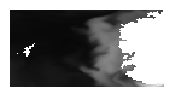

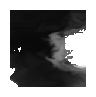

14:17:48.451 | INFO     | /home/anna/msc_oppgave/fish-forecast/plot_data.py:101 - Saved: so_2021-06-30.png


In [16]:
from plot_data import plot_copernicus_variable

variable = "so"   		# Example variable to plot
depth = 4.940250e-01    # first depth level in the dataset


for data, coords in zip(
	[copernicus_data_test, copernicus_data_square],
	[new_coords, square_coords]
):
	# normalize the variable at depth level to [0, 1]
	data_norm = data.copy()
	data_norm[variable] = (
		data[variable] - data[variable].min()
	) / (data[variable].max() - data[variable].min())

	# plot full extent
	# plot_copernicus_variable(data_norm, variable, depth=depth)

	# plot with complementary coords
	plot_copernicus_variable(data_norm, variable, region_coords=coords, depth=depth)
plot_copernicus_variable(data_norm, variable, depth=depth,out_folder='', region_coords=coords)

/tmp/ipykernel_165117/1305143986.py:19: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lat_dim = ds.dims["latitude"]
/tmp/ipykernel_165117/1305143986.py:20: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lon_dim = ds.dims["longitude"]
17:02:20.619 | DEBUG    | /tmp/ipykernel_165117/1305143986.py:61 - Variable: so, Min: 25.119785126298666, Max: 35.35569319501519
17:02:20.620 | DEBUG    | /tmp/ipykernel_165117/1305143986.py:61 - Variable: thetao, Min: 7.789635926485062, Max: 17.87173070758581
17:02:20.621 | DEBUG    | /tmp/ipykernel_165117/1305143986.py:61 - Variable: uo, Min: -0.6530961021780

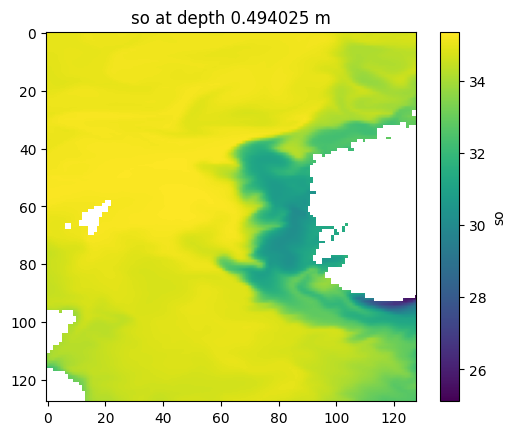

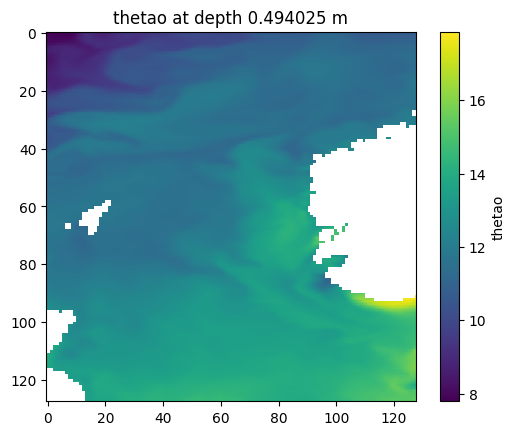

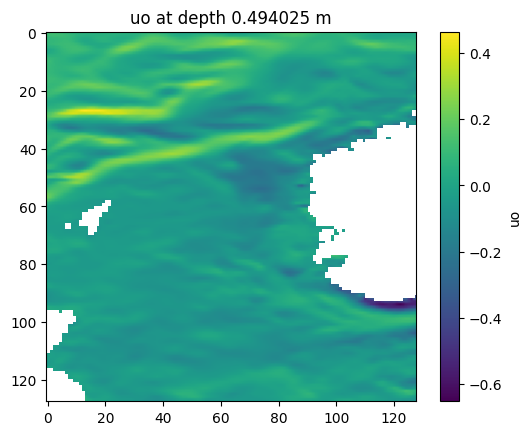

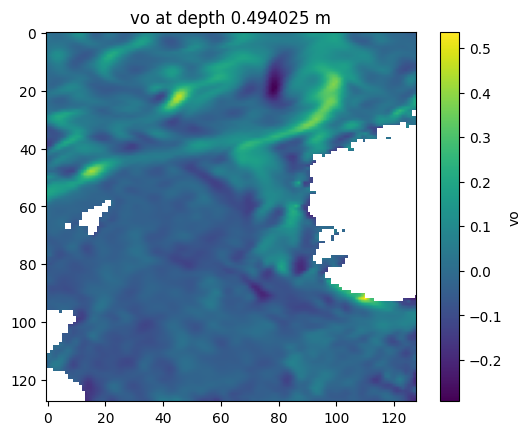

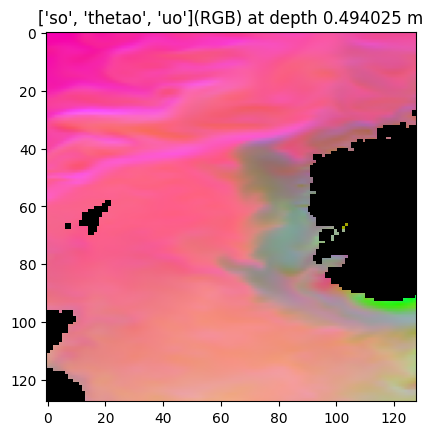

In [143]:
import os
import numpy as np
from logger import logger
import matplotlib.pyplot as plt

def extract_copernicus_variable(ds, variable="temperature", out_folder=None, region_coords=None, depth: int = 0):
    """
    Extract a 2D NumPy array (or arrays, if multiple variables) of the given variable at the specified depth.
    If region_coords is given, values outside the bounding box will be set to NaN.

    Returns:
        dict: mapping variable name → 2D NumPy array of shape (lat, lon)
    """
    # ensure we always have a list of variable names
    variables = variable if isinstance(variable, list) else [variable]
    result = {}

    # get amount of datapoints in lat and lon dimensions
    lat_dim = ds.dims["latitude"]
    lon_dim = ds.dims["longitude"]

    #create an empty array for each variable
    for var in variables:
        result[var] = np.full((lat_dim, lon_dim), np.nan, dtype=np.float32)
        # populate the array with the data at the specified depth
        if var in ds:
            result[var] = ds[var].sel(depth=depth)
            result[var] = result[var][0]
            # flip the array to match the expected orientation
            result[var] = np.flipud(result[var].values)

            # logger.info(f"type: {type(result[var])}, shape: {result[var].shape}")
    return result

variables = ["so", "thetao", "uo", "vo"]
mat = dict()
min_dict = dict()
max_dict = dict()

for data, coords in zip(
    [copernicus_data_square],
    [square_coords]
):


    mat = extract_copernicus_variable(data, variables, region_coords=coords, depth=depth)

    for variable in variables:
        plt.figure()
        plt.title(f"{variable} at depth {depth} m")
        plt.imshow(mat[variable])
        plt.colorbar(label=variable)

# Stack the first three variables into a matrix and show the image as RGB
norm_mat = mat.copy()  # create a copy to normalize
inspect_vars = variables[:3]  # only normalize the first three variables

for var in inspect_vars:
    min_dict[var] = copernicus_data_square[var].sel(depth=depth).min().values
    max_dict[var] = copernicus_data_square[var].sel(depth=depth).max().values
    logger.debug(f"Variable: {var}, Min: {min_dict[var]}, Max: {max_dict[var]}")

    norm_mat[var] = (mat[var] - min_dict[var]) / (max_dict[var] - min_dict[var])

stacked = np.stack([norm_mat[var] for var in inspect_vars], axis=-1)

# logger.debug(norm_mat[variables[0]])

plt.figure()
plt.imshow(stacked)
plt.title(f"{inspect_vars}(RGB) at depth {depth} m")
# plt.colorbar(label=inspect_vars)
logger.info(f"Stacked shape: {stacked.shape}, dtype: {stacked.dtype}")